<a href="https://colab.research.google.com/github/guilhermelaviola/MachineLearningExamples/blob/main/MachineLearningExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataset:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
# Displaying train data:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Displaying test data:
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


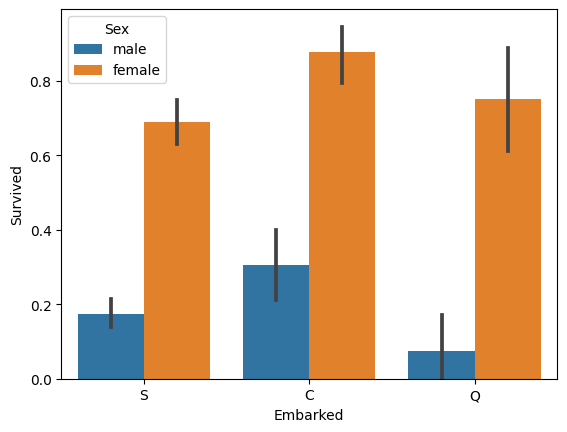

In [5]:
# Visualizing the data:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = data_train)
plt.show()

In [7]:
# Cleaning/transforming the data:
def simplify_ages(df):
  df.Age = df.Age.fillna(-0.5)
  bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
  group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student',
                 'Young Adult', 'Adult', 'Senior']
  categories = pd.cut(df.Age, bins, labels = group_names)
  df.Age = categories
  return df

In [8]:
def simplify_cabins(df):
  df.Cabin = df.Cabin.fillna('N')
  df.Cabin = df.Cabin.apply(lambda x : x[0])
  return df

In [9]:
def simplify_fares(df):
  df.Fare = df.Fare.fillna(-0.5)
  bins = (-1, 0, 8, 15, 31, 1000)
  group_names = ['Unknown', '1_quartile', '2_quartile',
                 '3_quartile', '4_quartile']
  categories = pd.cut(df.Fare, bins, labels = group_names)
  df.Fare = categories
  return df

In [10]:
def format_name(df):
  df['Lname'] = df.Name.applu(lambda x : x.split(' ')[0])
  df['NamePrefix'] = df.Name.apply(lambda x : x.split(' ')[1])
  return df

In [11]:
def drop_features(df):
  return df.drop(['Ticket', 'Name', 'Embarked'], axis = 1)

In [16]:
def transform_features(df):
  df = simplify_ages(df)
  df = simplify_cabins(df)
  df = simplify_fares(df)
  df = format_name(df)
  df = drop_features(df)
  return df

In [18]:
data_train = transform_features(data_train)
data_test = transform_features(data_test)

TypeError: ignored

In [20]:
# Encoding the data (converting each unique string into a number):
def encode_features(df_train, df_test):
  features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
  df_combined = pd.concat([df_train[features], df_test[features]])

  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    df_train[feature] = le.transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])
  return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)

KeyError: ignored

In [24]:
# Splitting the data into Training and Test sets:
x_all = data_train.drop(['Survived', 'PassengerId'], axis = 1)
y_all = data_train['Survived']

num_test = 0.20
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all,
                                                    test_size = num_test,
                                                    random_state = 23)

In [29]:
# Fitting and tuning the Machine Learning Algorithm:
# Choosing the Classifier type (in this case, the RandomForestClassifier):
clf = RandomForestClassifier()

# Defining some parameter combinations for testing:
parameters = {'n_estimators' : [4, 6, 9],
              'max_features' : ['log2', 'sqrt', 'auto'],
              'criterion' : ['entropy', 'gini'],
              'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]
}

# Defining the type of scoring used to compare parameter combinations:
acc_scorer = make_scorer(accuracy_score)

# Running the grid search:
grid_object = GridSearchCV(clf, parameters, scoring = acc_scorer)
grid_object = grid_object.fit(x_train, y_train)

# Setting the clf to the best combination of parameters:
clf = grid_object.fit(x_train, y_train)

# Setting the clf to the best combination of parameters:
clf = grid_object.best_estimator_

# Fitting the best algorithm to the data:
clf.fit(x_train, y_train)

ValueError: ignored

In [ ]:
# Cross validating with KFold:

In [ ]:
# Prediction on the test set: